# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
import warnings
warnings.filterwarnings('ignore')
import os
print(os.getcwd())

from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Project_FullCode.ipynb
!jupyter nbconvert --to html "/content/drive/MyDrive/Project_FullCode.ipynb"
from google.colab import output
notebook_path = '/content/drive/MyDrive/Project_FullCode.ipynb'
!jupyter nbconvert --to html "/content/drive/MyDrive/Project_FullCode.ipynb"

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Project_FullCode.ipynb
[NbConvertApp] Converting notebook /content/drive/MyDrive/Project_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Writing 1059299 bytes to /content/drive/MyDrive/Project_FullCode.html
[NbConvertApp] Converting notebook /content/drive/MyDrive/Project_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Writing 1058404 bytes to /content/drive/MyDrive/Project_FullCode.html


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
The code above presents us the number of rows and columns in numerical format as so: (rows, columns). We can observe that there are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The info() function in this line of code presents us with the properties of all the columns such as the index, column title, the Non-Null Count,data type, and memory usage. We can observe that there seems to be no missing values in the data frame. The chosen data types have numerical columns represented as integers and floating-point numbers. The categorical data are stored as objects.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
We can see that there are no missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
We see that the minimum time it takes for food to be prepared for an order is 15 (minutes). The dataset does not specify the units for this value, but based on the typical length of time for delivery times using food apps, we can assume that the unites are in minutes. Especially since the range that we are working with is 15-33, it can be assumed it is in minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
norating = df['rating'].eq("Not given").sum()
print(f"The number of orders with no rating is: {norating}")

The number of orders with no rating is: 736


#### Observations:
We can observe that there are 736 orders that were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df['order_id'].nunique()

1898

The order_id is a unique identifier for each order, and there are 1898 total entries in the dataset. Since each order has a unique ID, no statistical analysis such as mean or median is applicable here.

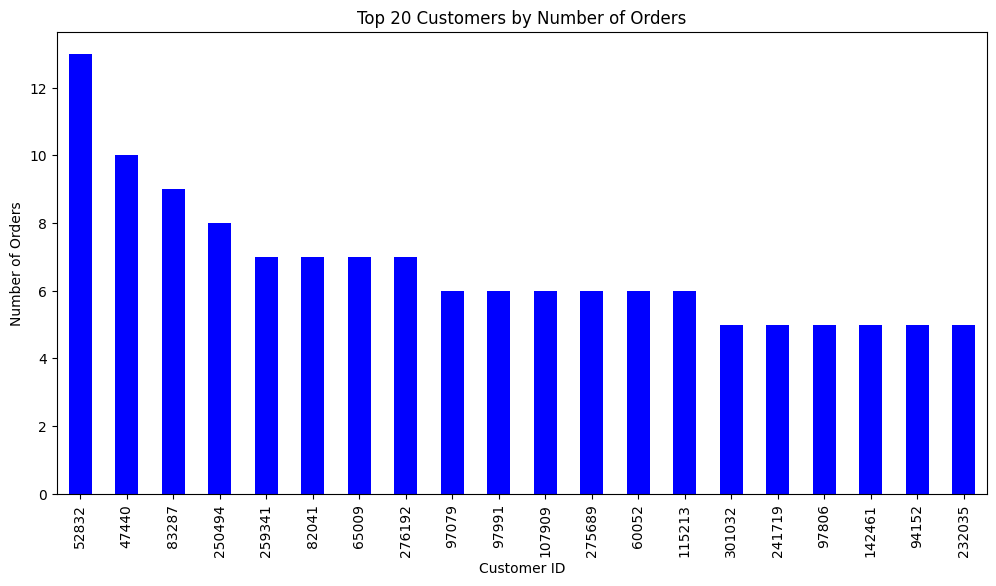

In [ ]:
top_customers = df['customer_id'].value_counts().head(20)
top_customers.plot(kind='bar', color='b', figsize=(12, 6))
plt.title('Top 20 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


The top 20 customers by order count show a slight left skew, with the number of orders gradually decreasing from 12 to 5. While the first few customers have placed significantly more orders, the majority of the top 20 customers have placed a relatively similar number of orders, indicating a moderately loyal customer base with consistent ordering behavior.

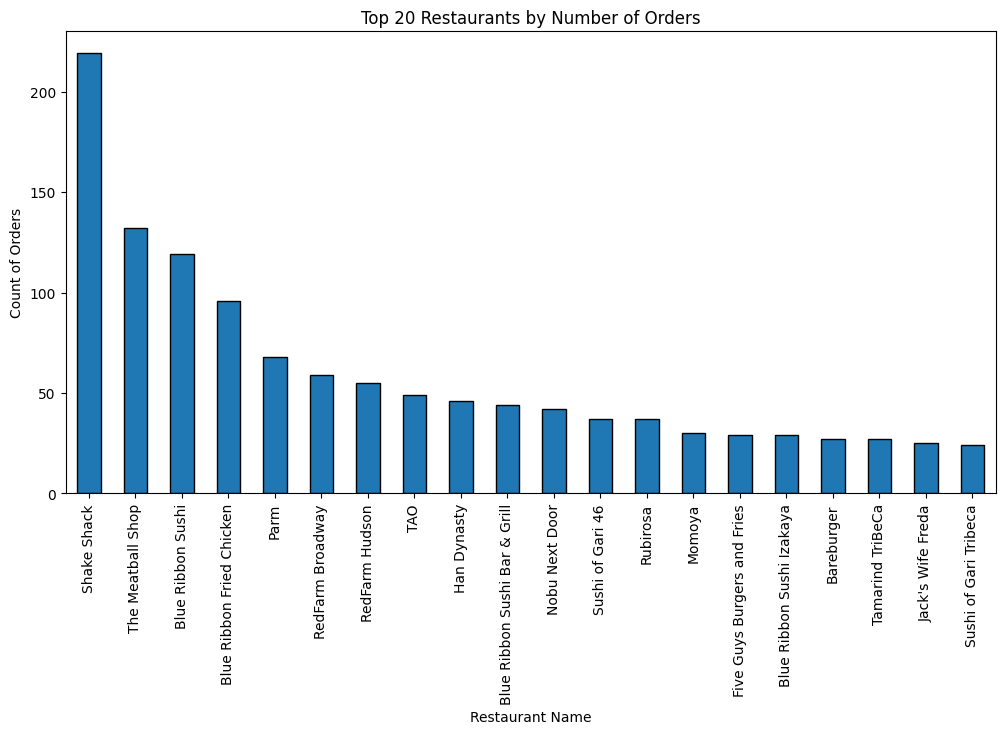

In [ ]:
restaurant_counts = df['restaurant_name'].value_counts().sort_values(ascending=False)
restaurant_counts.head(20).plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Top 20 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Count of Orders')
plt.xticks(rotation=90)
plt.show()

Due to the large number of restaurants in the data set, we can take the top 20 restaurants to create a countplot to observe and analyze the counts of orders by popularity. We can observe that Shake Shack has a signficantly higher order count than The Meatball Shop, which ranks second in terms of order volume. Following The Meatball Shop, the remaining restaurants follow in decreasing order of order count, with fewer dramatic differences and more closer order counts.

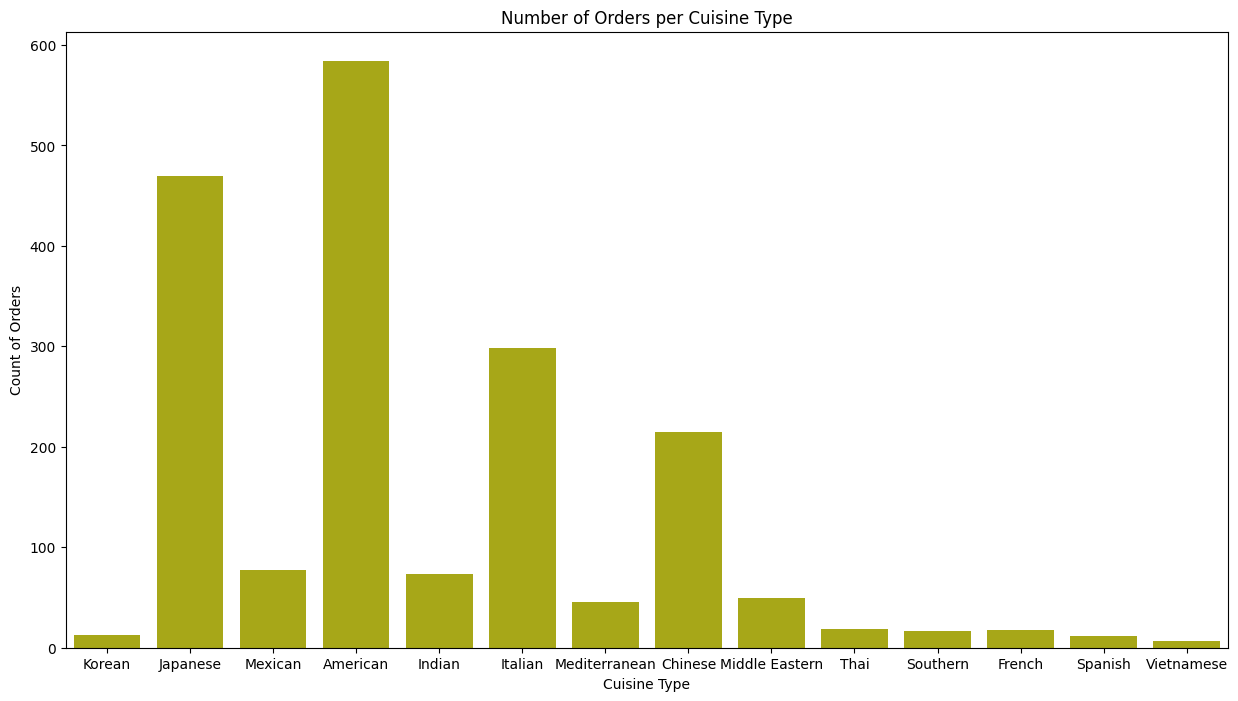

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='cuisine_type', color='y', data=df)
plt.title('Number of Orders per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count of Orders')
plt.show()

We created a barplot for showing the count of orders per Cuisine Type. We can observe that American cusine has the highest number of orders at 550+ orders. Vietnamese cusine ranks as the cuisine with the lowest number of orders at well under 50.





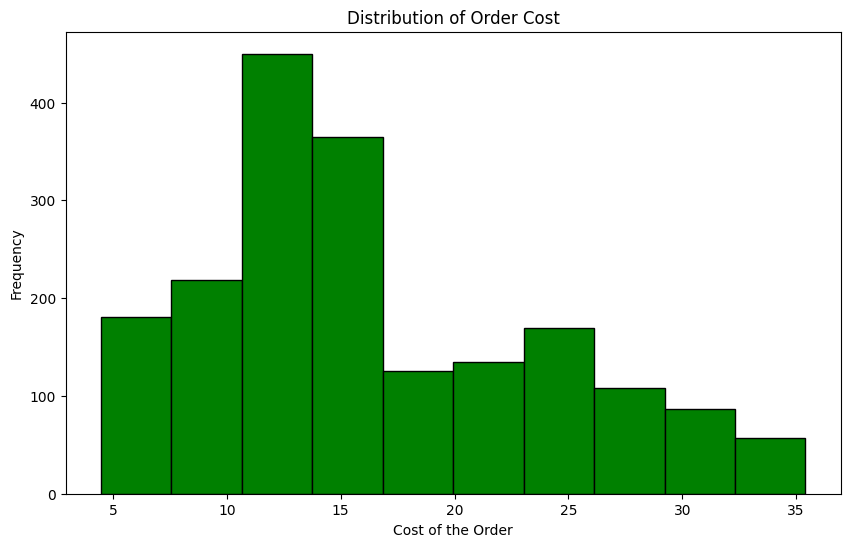

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df.cost_of_the_order, color='g', edgecolor='black')
plt.title('Distribution of Order Cost')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

In this histogram we can observe that the Distribution of Order Cost is quite uniform. The highest frequency of orders are priced at about 12-13 dollars. The lowest frequency of orders are priced at 4-6 dollars. There do not seem to be any outliers.


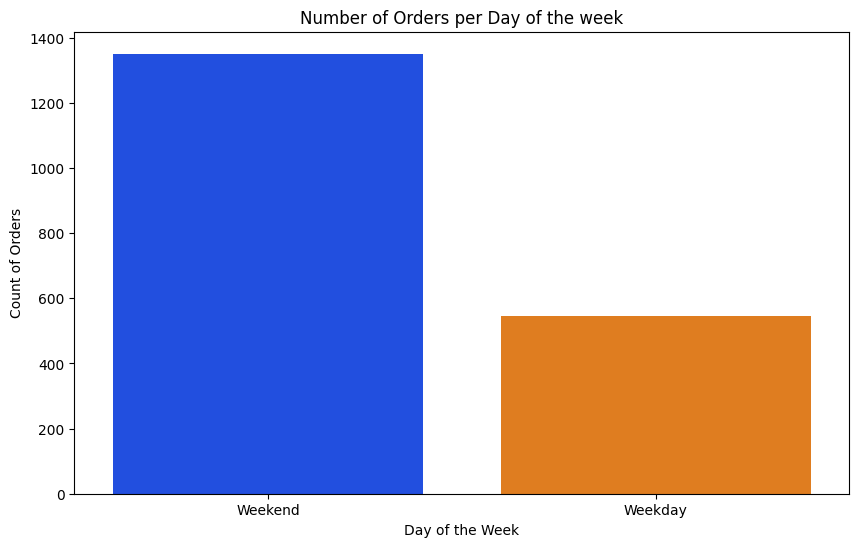

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'day_of_the_week', palette='bright', data=df)
plt.title('Number of Orders per Day of the week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Orders')
plt.show()

We observe that the highest number of orders are places on the Weekends at about 1300+ orders as compared to the Weekday at 500+ orders.

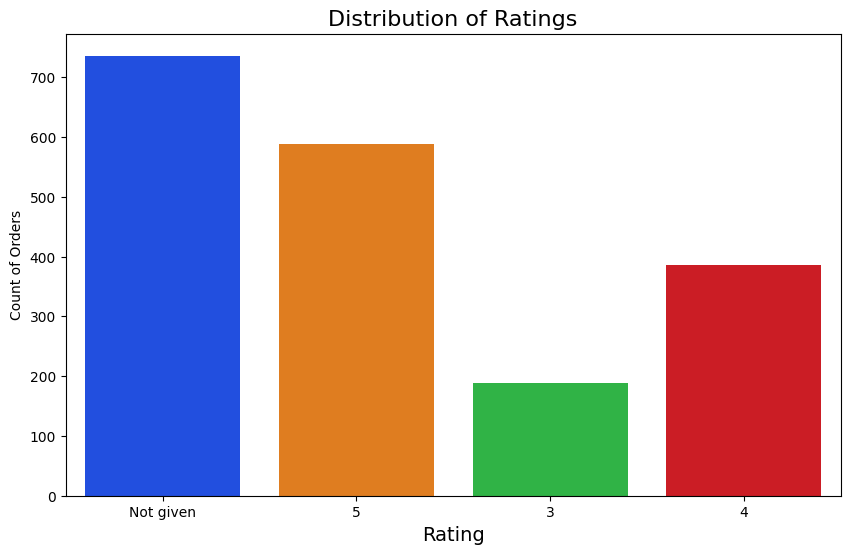

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', palette='bright', data=df)
plt.title('Distribution of Ratings', size=16)
plt.xlabel('Rating', size=14)
plt.ylabel('Count of Orders')
plt.show()

The bar plot depicts the highest count of orders were Not Given a rating at 700+ orders. This was followed by a Rating of 5 for the second highest count of orders at approximately 600 orders. A rating of 3 was given to the lowest number of orders at approximately 200 orders.

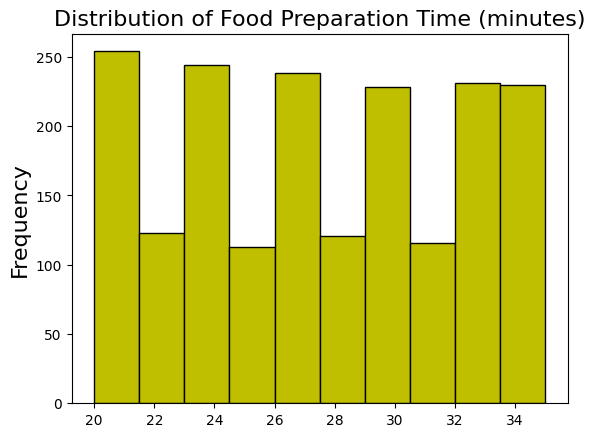

In [ ]:
plt.figurefigsize=(10,6)
plt.hist(df.food_preparation_time, color='y', bins=10, edgecolor='black')
plt.title('Distribution of Food Preparation Time (minutes)', size=16)
plt.ylabel('Frequency', size=16)
plt.show()

The histogram of food preparation times reveals a uniform distribution across the entire range of 0 to 34 minutes. This indicates that preparation times are consistent, with no significant clustering in any particular time interval. The absence of skewness and outliers further suggests operational stability and predictability in food preparation. Given this even distribution, it can be expected that future preparation times will likely continue to follow this pattern, without any tendency towards faster or slower times.

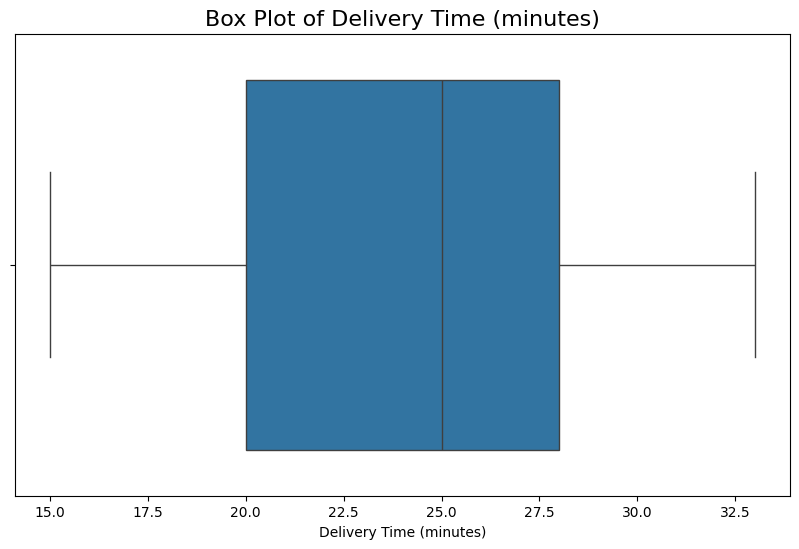

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df, x='delivery_time', orient='h')
plt.title('Box Plot of Delivery Time (minutes)', size=16)
plt.xlabel('Delivery Time (minutes)')
plt.show()

The box plot for delivery time shows equal-sized whiskers, indicating a relatively symmetrical range for the lower and upper quartiles. However, the median is closer to the upper quartile (Q3), suggesting that the distribution is right-skewed. This means that while most deliveries occur within a shorter time range, there are a few long delivery times that are pulling the median towards the higher end, resulting in a right-skewed distribution. The median for this data is at 25 minutes. The Inter-Quartile Range spans from 15-32.5 minutes, with 50% of the orders being delivered within this range.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_data = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_data['cuisine_type'].value_counts().head(1)
print(most_popular_cuisine)

American    415
Name: cuisine_type, dtype: int64


#### Observations:
The most popular cuisine on the weekends is American with the highest order count of 415. This suggests that customers have a strong preference for American cuisine on the weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
total_orders = len(df)
orders_above_20 = len(df[df['cost_of_the_order'] > 20])
percent_above_20 = (orders_above_20 / total_orders) * 100
print(f"Percentage of orders costing more than 20 dollars: {percent_above_20:.2f}%")

Percentage of orders costing more than 20 dollars: 29.24%


#### Observations:
Approximately 29.24% of the orders cost more than 20 dollars. This suggests that while there is a significant portion of the orders above 20 dollars, the majority of orders are priced lower, showing a relatively balanced distribution in the dataset.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time}")

The mean order delivery time is: 24.161749209694417


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
customer_order_counts = df.groupby('customer_id').size()
top_3_customers = customer_order_counts.sort_values(ascending=False).head(3)
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
dtype: int64


#### Observations:
The top 3 most frequent customers are customer IDs 52832, 47440, and 83287, with 13, 10, and 9 orders placed, respectively. These are the customers who will receive 20% discount vouchers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


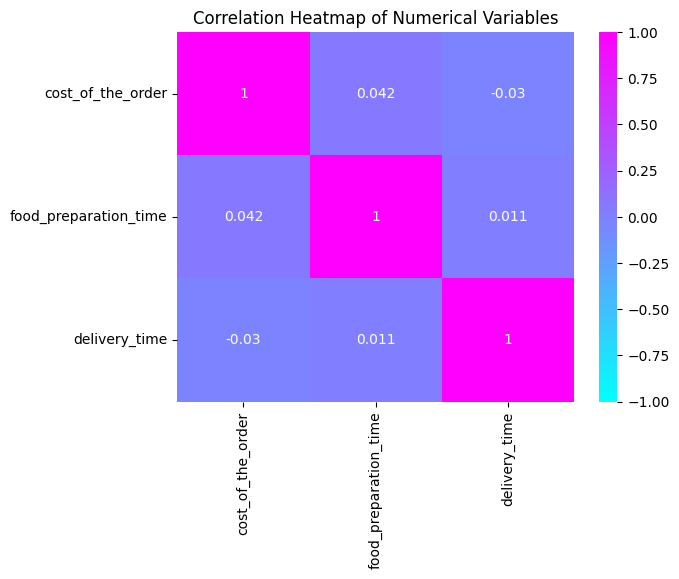

In [ ]:
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cool', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In this heatmap between the numerical variables, we can observe that we do not see a strong positive nor a strong negative correlation between any of the variables. These relationships are insignificant and nearly negligible. The correlation between the Cost of the Order and Food Preparation Time is 0.042, extremely weak. The correlation between the Cost of the Order and Deliveyr Time is -0.03 which is negative and insignificant. Laslty, the correlation between the Food Preparation Time and Delivery Time is almost no relationship at 0.011.

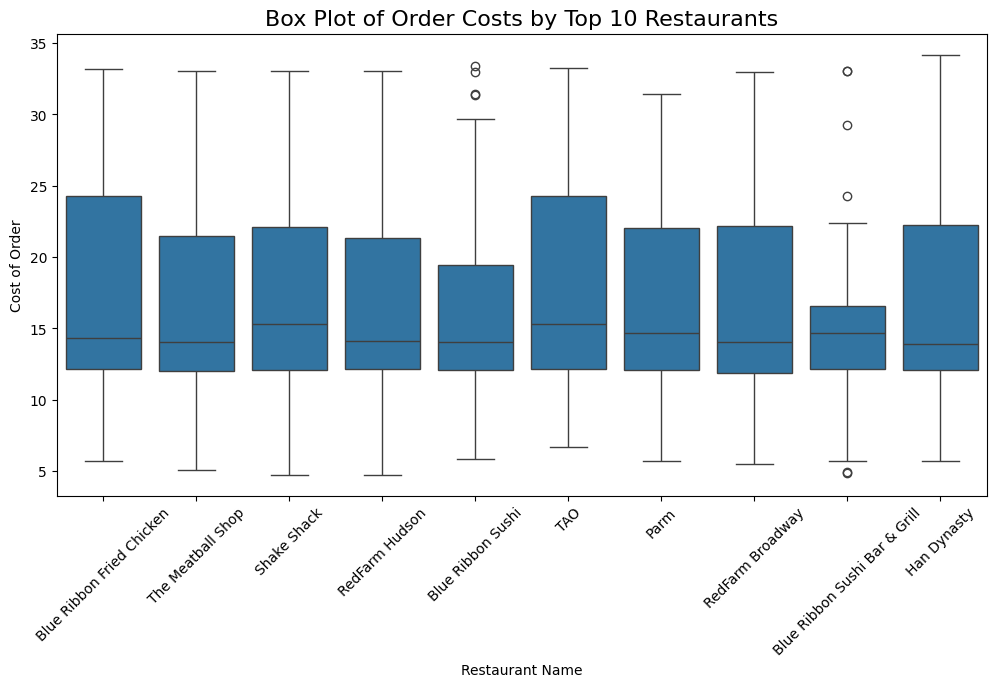

In [ ]:
top_restaurants = df['restaurant_name'].value_counts().head(10).index
filtered_df = df[df['restaurant_name'].isin(top_restaurants)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='restaurant_name', y='cost_of_the_order')
plt.title('Box Plot of Order Costs by Top 10 Restaurants', size=16)
plt.xlabel('Restaurant Name')
plt.ylabel('Cost of Order')
plt.xticks(rotation=45)
plt.show()

Since there are many restaurants, we can create a boxplot with the top 10 restaurants to conduct our analysis. The boxplot for the top 10 restaurants reveals that all of the restaurants have a similar average cost of order around 15 dollars. The spread of costs for these top restaurants shows both outliers and their range of prices, while others have more consistent order values.

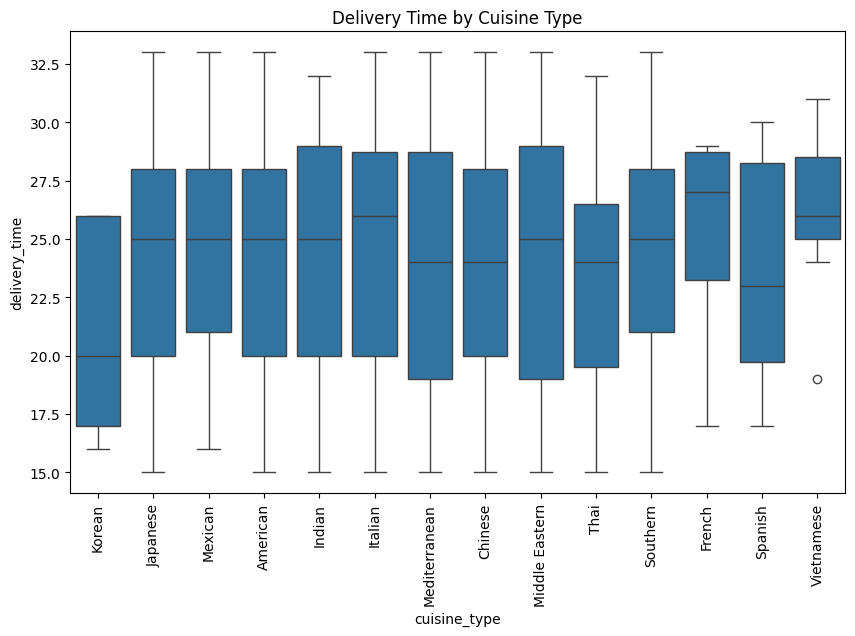

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=90)
plt.title('Delivery Time by Cuisine Type')
plt.show()

Looking at the boxplot for Delivery Time by Cuisine Type, we can observe that restaurants serving Korean Cuisine have the shortest delivery time on average with approximately 20 minutes. French cuisine on average has the longest delivery time at approximately 26 minutes.

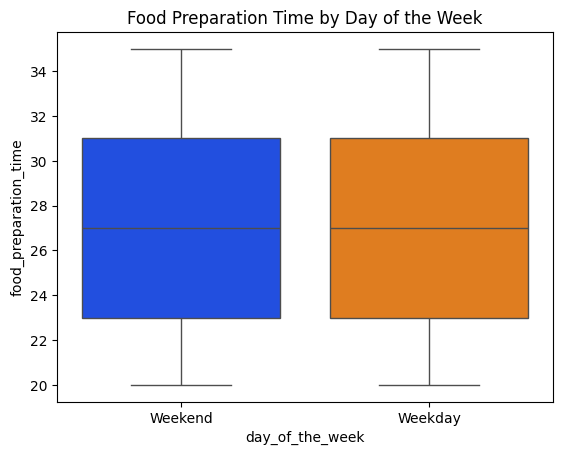

In [ ]:
sns.boxplot(x='day_of_the_week', y='food_preparation_time', palette= 'bright', data=df)
plt.title('Food Preparation Time by Day of the Week')
plt.show()

In this Boxplot for Food Preparation Time by Day of the Week, we can observe that the food preparation time is generally the same on the weekends as it is on the weekdays, at an average of about 27 minutes. We can see little to no skewness in the data and the range is from 20-34 minutes. This shows consistency by the workers at the restaurants.

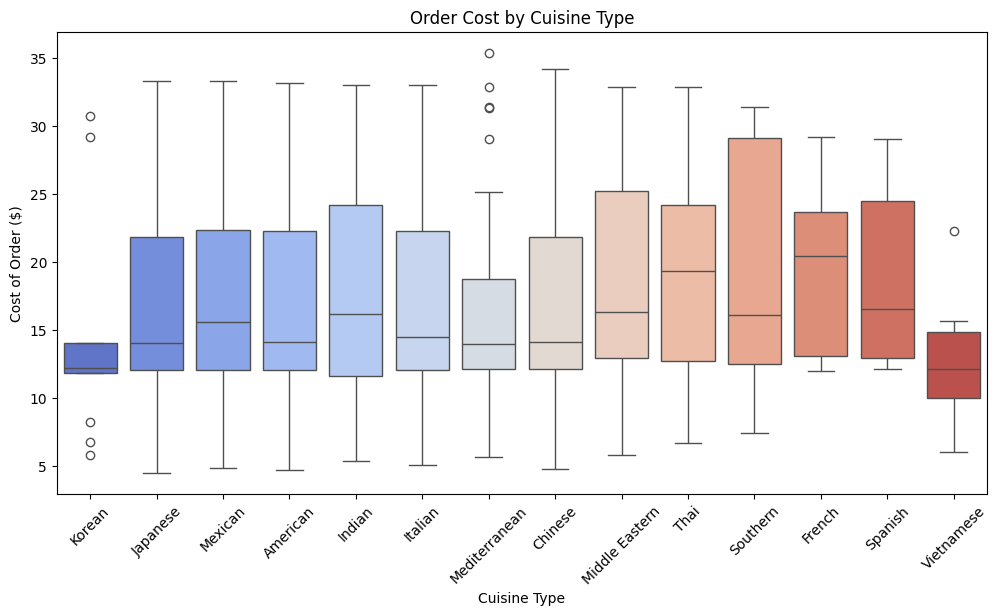

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='coolwarm')
plt.title('Order Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of Order ($)')
plt.xticks(rotation=45)
plt.show()

In this bar plot for the Order Cost by Cuisine Type, we can see that Vietnamese and Korean food have the lowest Cost of Order on average at about 12 dollars. French has the highest cost at about 20 dollars.

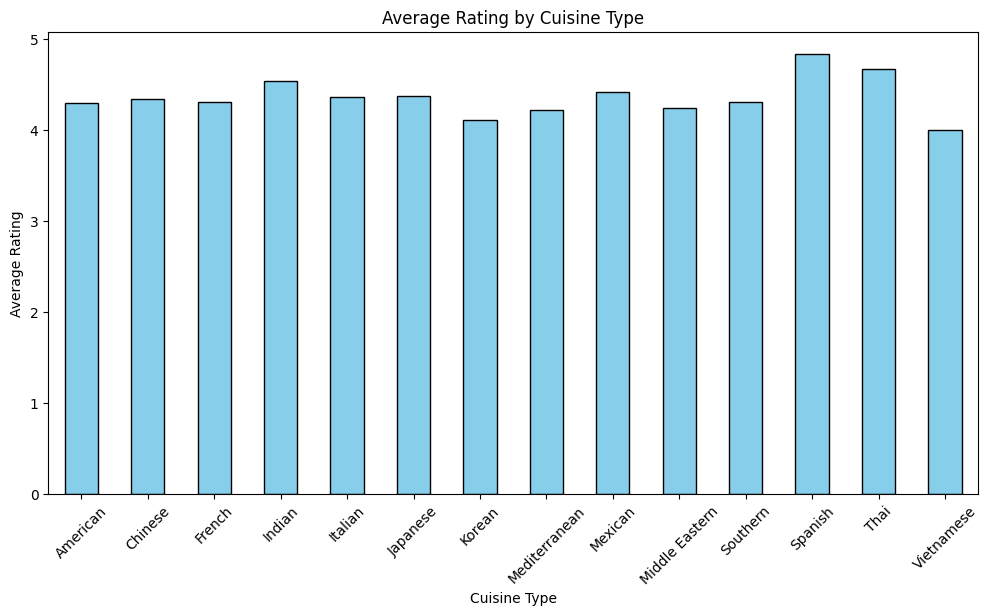

In [ ]:
rating_mapping = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
df['rating_numeric'] = df['rating'].map(rating_mapping)
avg_rating_by_cuisine = df.groupby('cuisine_type')['rating_numeric'].mean()
avg_rating_by_cuisine.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

We can observe in this barplot for Average Rating by Cuisine Type that the distribution is quite uniform in the 4-5 range. The highest rating is received by Spanish cuisine at about 4.9, and the lowest rating is received by Vietnamese cuisine at about 4.

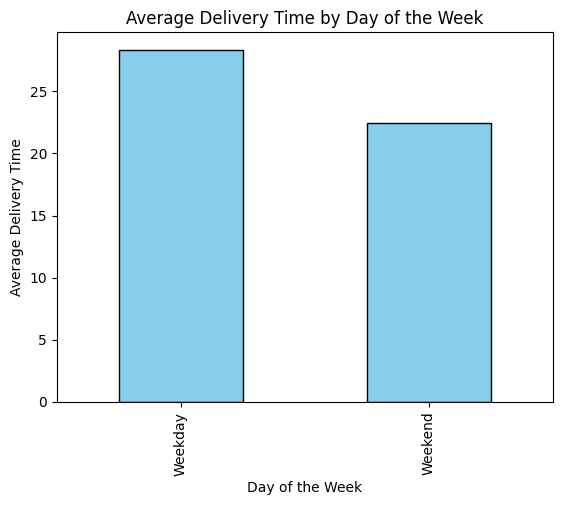

In [ ]:
avg_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
avg_delivery_time_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delivery Time')
plt.show()

In this barlplot for Average Delivery Time by Day of the Week, we can observe that the average delivery time for weekdays is higher at about 27 minutes than on the weekends at about 22 minutes. This could be due to logistics such as traffic and driver availability.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
print(eligible_restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
The restaurants that are eligible for the promotional offer based on having more than 50 ratings and an average rating above 4.0 are: Blue Ribbon Fried Chicken with 64 ratings to an average of 4.33, Blue Ribbon Sushi with 73 ratings averaged to 4.22, Shake Shack with 133 ratings averaged to 4.28, and The Meatball Shop with 84 ratings averaged to 4.51.
These restauarants have received a high number of positive ratings by customers which makes them fitting for the promotion.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0
df['revenue'] = df.apply(calculate_revenue, axis=1)
total_revenue = df['revenue'].sum()
print(f"Total net revenue generated by the company: ${total_revenue:.2f}")

Total net revenue generated by the company: $6166.30


The total net revenue generated by the company is 6166.30 dollars. This amount is calculated based on the 25 percent charge for orders above 20 dollars and the 15 percent charge for orders greater than 5 dollars but less than or equal to 20 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_orders = len(df)
orders_above_60 = len(df[df['total_time'] > 60])
percent_above_60 = (orders_above_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percent_above_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
Approximately 10.54 percent of the orders took more than 60 minutes to be delivered, including food preparation and delivery time. This suggests that the majority of orders are delivered under an hour and only a small portion of orders face delays. This could be due to restaurant delays or challenges with delivery and traffic.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
weekend_data = df[df['day_of_the_week'] == 'Weekend']
weekday_data = df[df['day_of_the_week'] == 'Weekday']
mean_weekend_delivery_time = weekend_data['delivery_time'].mean()
mean_weekday_delivery_time = weekday_data['delivery_time'].mean()
print(f"Mean delivery time on weekends: {mean_weekend_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekdays: {mean_weekday_delivery_time:.2f} minutes")

Mean delivery time on weekends: 22.47 minutes
Mean delivery time on weekdays: 28.34 minutes


#### Observations:
The mean delivery time for orders on the weekends is 22.47 minutes and for the weekdays it is 28.34 minutes. This suggests that deliveries take longer on weekdays, possibly due to high order volumes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Customer Behavior: The company has a small group of highly frequent customers, but there is potential to increase repeat business. Popular restaurants include Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.

Cuisine Preferences: American cuisine is the most popular, especially on
weekends, while Vietnamese and Korean cuisines have lower average order costs.

Order Costs: 29.24% of orders exceed $20, showing a balance between affordable and premium options.

Delivery Times: Delivery times are longer on weekdays (28.34 minutes) compared to weekends (22.47 minutes), suggesting potential inefficiencies.

Ratings and Satisfaction: Most cuisines receive ratings between 4 and 5 stars, with several restaurants eligible for promotional offers due to high customer satisfaction.





### Recommendations:

Customer Retention: Implement loyalty programs and personalized offers to encourage repeat orders from less frequent customers.

Optimize Delivery: Improve delivery efficiency on weekdays by adjusting routes or increasing drivers during peak times.

Targeted Promotions: Offer discounts or special deals to high-spend customers (those with orders over $20) to increase revenue.

Cuisine-Specific Offers: Create value deals for affordable cuisines (Vietnamese, Korean) and premium offers for higher-cost cuisines (French, Spanish).

Encourage Feedback: Incentivize customers to leave ratings to gain better insights into satisfaction and improve services.

Promote Top-Rated Restaurants: Highlight top-rated restaurants in marketing materials to attract customers seeking quality dining experiences.

---